# Task 1: Feed-forward neural networks


---

Tutorial: "Machine Learning in Solid Mechanics @ Cyber-Physical Simulation, TU Darmstadt

Lecturer: Prof. Oliver Weeger

Assistants: Dominik K. Klein, Jasper O. Schommartz

Winter term 2024 / 2025


---





*Run the following cell to clone the GitHub repository in your current Google Colab environment.*

In [1]:
!git clone https://github.com/CPShub/TutorialMLinSolidMechanics.git

Cloning into 'TutorialMLinSolidMechanics'...
remote: Enumerating objects: 209, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 209 (delta 29), reused 60 (delta 15), pack-reused 128 (from 1)
Receiving objects: 100% (209/209), 6.74 MiB | 11.36 MiB/s, done.
Resolving deltas: 100% (33/33), done.


*Run the following cell to import all modules and python files to this notebook. If you made changes in the python files, run the following cell again to update the python files in this notebook. You might need to restart your Colab session first ("Runtime / Restart session" in the header menu).*

In [6]:
from matplotlib import pyplot as plt
import tensorflow as tf
import datetime
now = datetime.datetime.now

import importlib

# %% Own modules
import data as ld
importlib.reload(ld)
import models as lm
importlib.reload(lm)

<module 'models' from 'f:\\CPShub\\TutorialMLinSolidMechanics\\Winter_term_24_25\\FFNN_introduction_1.2\\models.py'>

### Compare FFNN with ICNN

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 private_x_to_y_3 (_x_to_y)  (None, 1)                 321       
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
2024-11-04 17:24:25.812130
Epoch 1/500
11/11 - 0s - loss: 6.8635 - 394ms/epoch - 36ms/step
Epoch 2/500
11/11 - 0s - loss: 5.3472 - 38ms/epoch - 3ms/step
Epoch 3/500
11/11 - 0s - loss: 3.6976 - 41ms/epoch - 4ms/step
Epoch 4/500
11/11 - 0s - loss: 2.6194 - 37ms/epoch - 3ms/step
Epoch 5/500
11/11 - 0s - loss: 1.9005 - 39ms/epoch - 4ms/step
Epoch 6/500
11/11 - 0s - loss: 1.4151 - 39ms/epoch - 4ms/step
Epoch 7/500
11/11 - 0s - loss: 1.0764 - 34ms/epoch - 3ms

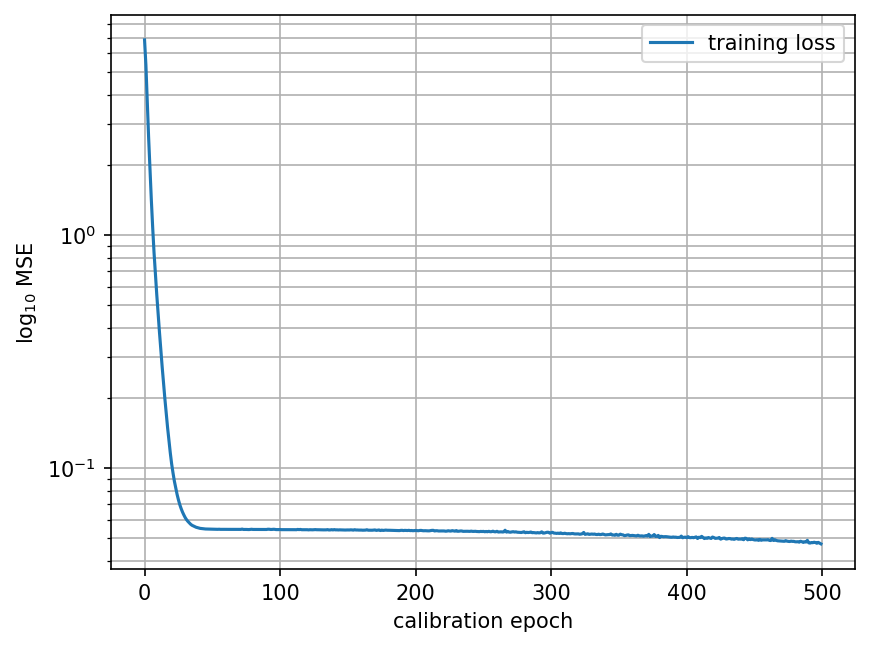

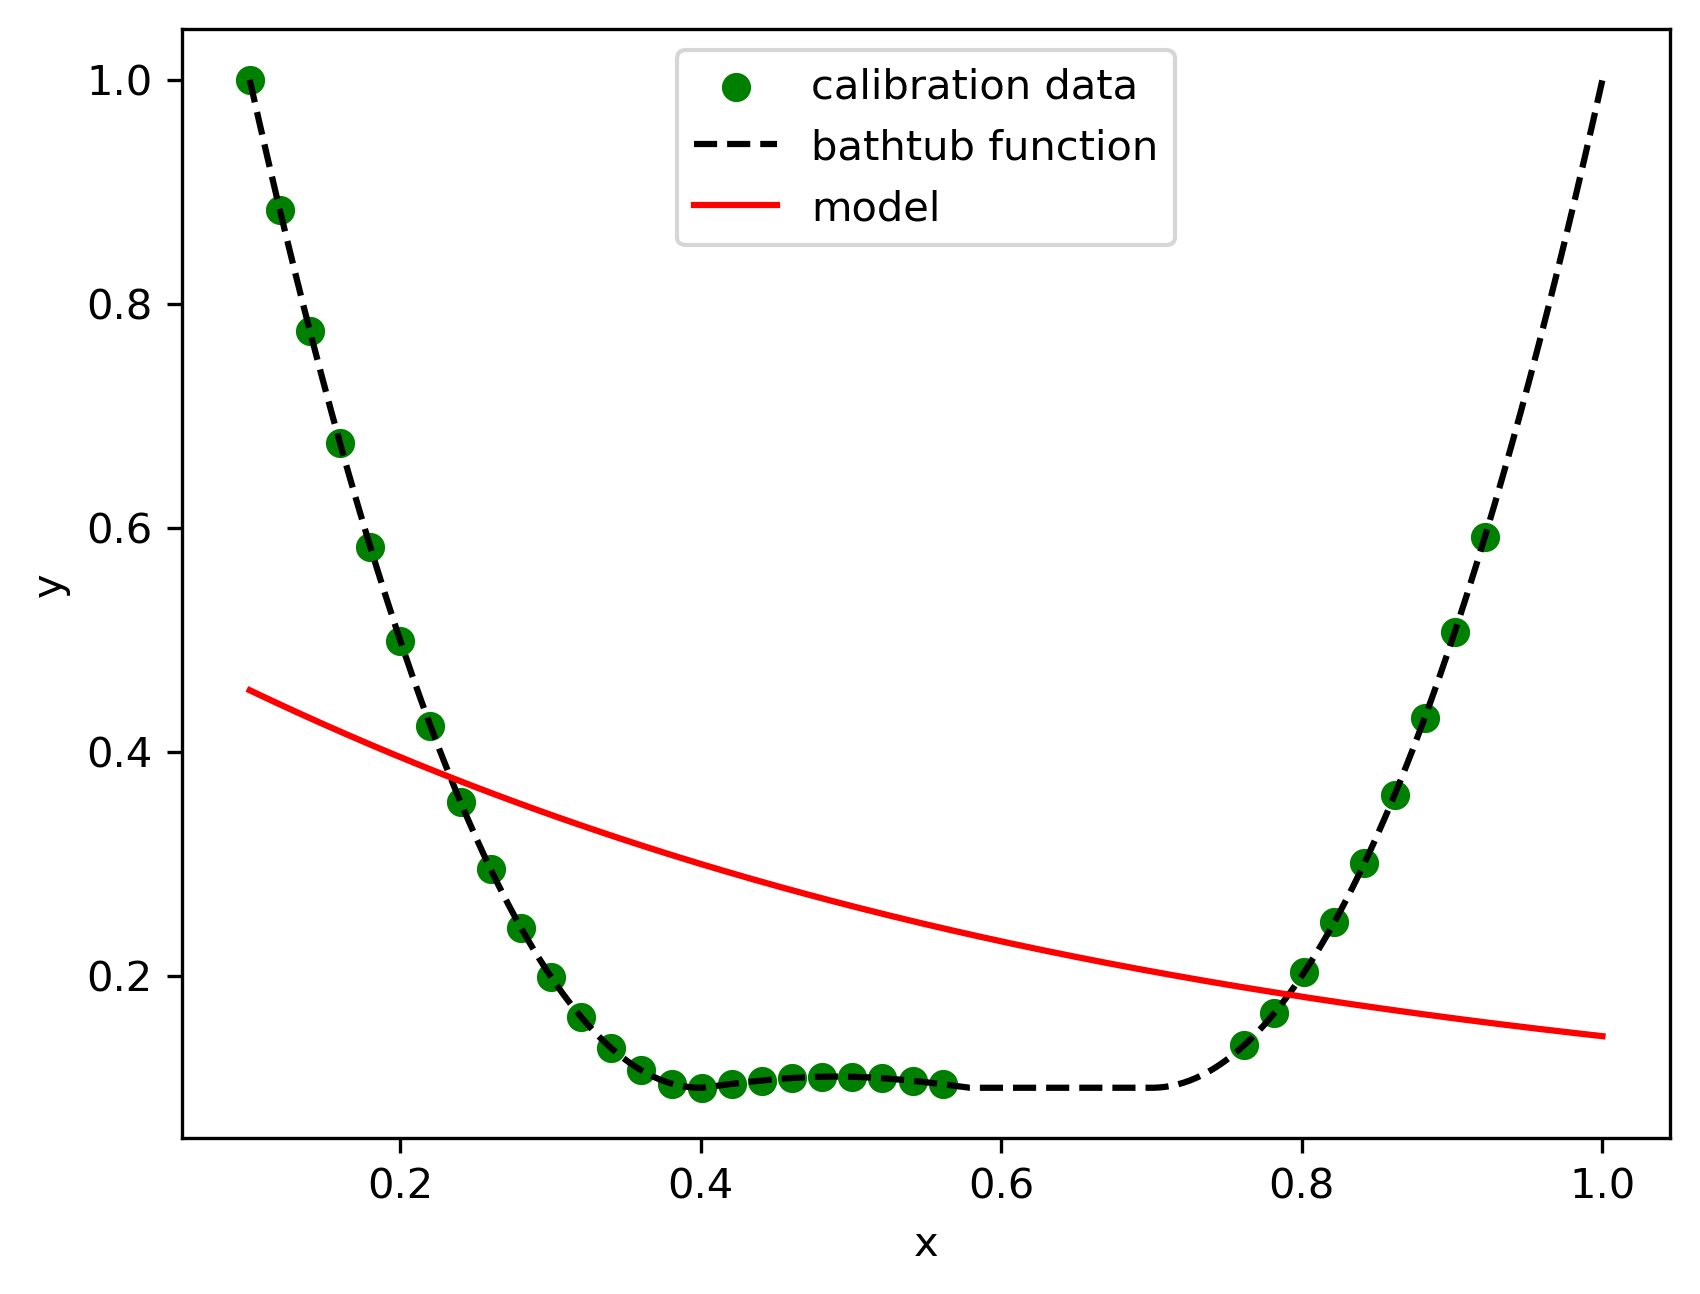

In [ ]:
model = lm.main()

xs, ys, xs_c, ys_c = ld.bathtub()

model.summary()

t1 = now()
print(t1)

model.optimizer.learning_rate.assign(0.002)
h = model.fit([xs_c], [ys_c], epochs = 1000,  verbose = 2)

t2 = now()
print('it took', t2 - t1, '(sec) to calibrate the model')

# plot some results
plt.figure(1, dpi=150)
plt.semilogy(h.history['loss'], label='training loss')
plt.grid(which='both')
plt.xlabel('calibration epoch')
plt.ylabel('log$_{10}$ MSE')
plt.legend()

plt.figure(2, dpi=300)
plt.scatter(xs_c[::10], ys_c[::10], c='green', label = 'calibration data')
plt.plot(xs, ys, c='black', linestyle='--', label='bathtub function')
plt.plot(xs, model.predict(xs), label='model', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()